# Kaggle ISIC 2024 Challenge

## Packages

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import random
import h5py #for working with .hdf5 files
from PIL import Image #python image library

## Exploratory Data Analysis (EDA)

### Image Exploration

In [42]:
def display_images(image_data, num_images=5):
    # Function to display images
    plt.figure(figsize=(15, 10))
    
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1) # Create subplot: nrows, ncols, index
        image_id = random.choice(list(image_data.keys())) # Grab random ID from hdf5 keys
        image = np.array(image_data[image_id]) # Convert image data to array
        image = Image.open(io.BytesIO(image)) # Open as PIL
        plt.imshow(image)
        plt.title(image_id)
    
    plt.show()

def get_image_sizes(image_data):
    # Function to get image sizes
    sizes = []
    for image_id in image_data.keys():
        image = np.array(image_data[image_id]) # Convert image data to array
        image = Image.open(io.BytesIO(image)) # Open as PIL
        sizes.append(image.size) # PIL size function to determine size and append to list
    return sizes

def plot_image_size_distribution(sizes):
    # Function to plot image size distribution
    widths, heights = zip(*sizes)

    plt.figure(figsize=(12,6))

    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=20, color='blue', alpha=0.7)
    plt.title('Image Width Distribution')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=20, color='green', alpha=0.7)
    plt.title('Image Height Distribution')
    plt.xlabel('Height (pixels)')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Width range: {min(widths)} - {max(widths)} pixels")
    print(f"Height range: {min(heights)} - {max(heights)} pixels")

def get_image_count(image_data):
    # Function to get image count
    return len(image_data.keys())

def check_non_square_images(sizes):
    # Function to check for non-square images
    non_squares = [size for size in sizes if size[0] != size[1]]
    return non_squares

Random Train Images


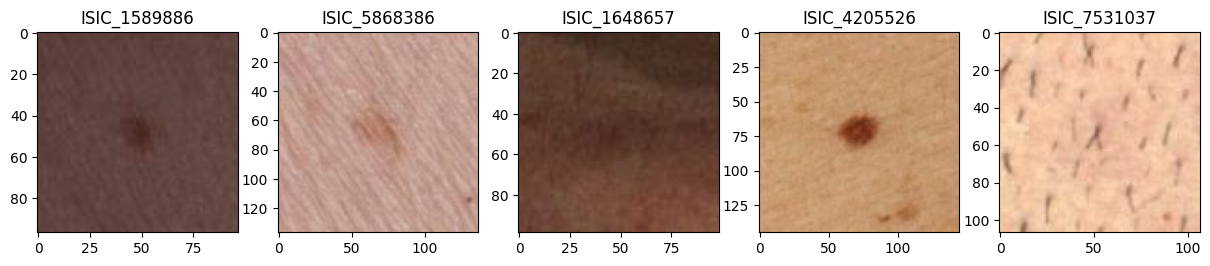

Analyzing Train Images


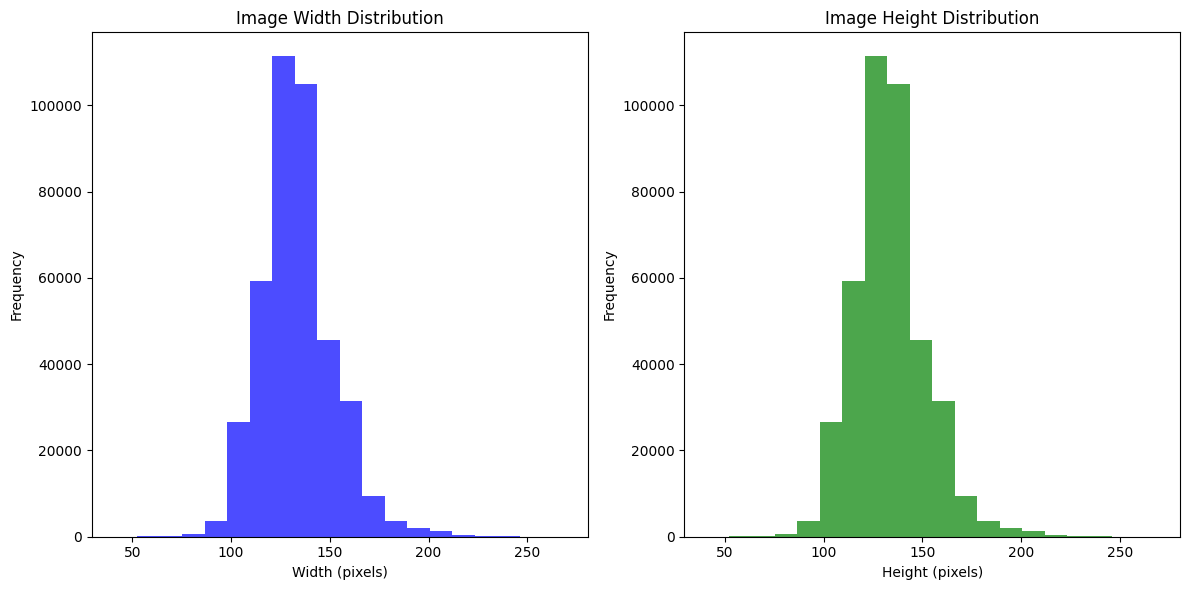

Width range: 41 - 269 pixels
Height range: 41 - 269 pixels
Total number of train images: 401059
Number of non-square train images: 0

Random Test Images


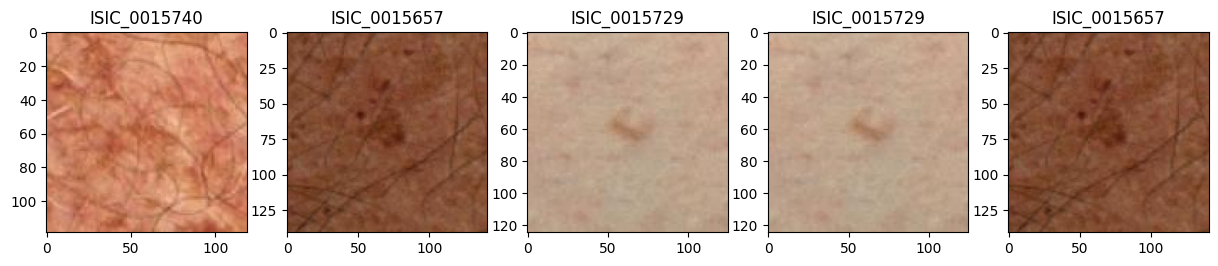

Analyzing Test Images


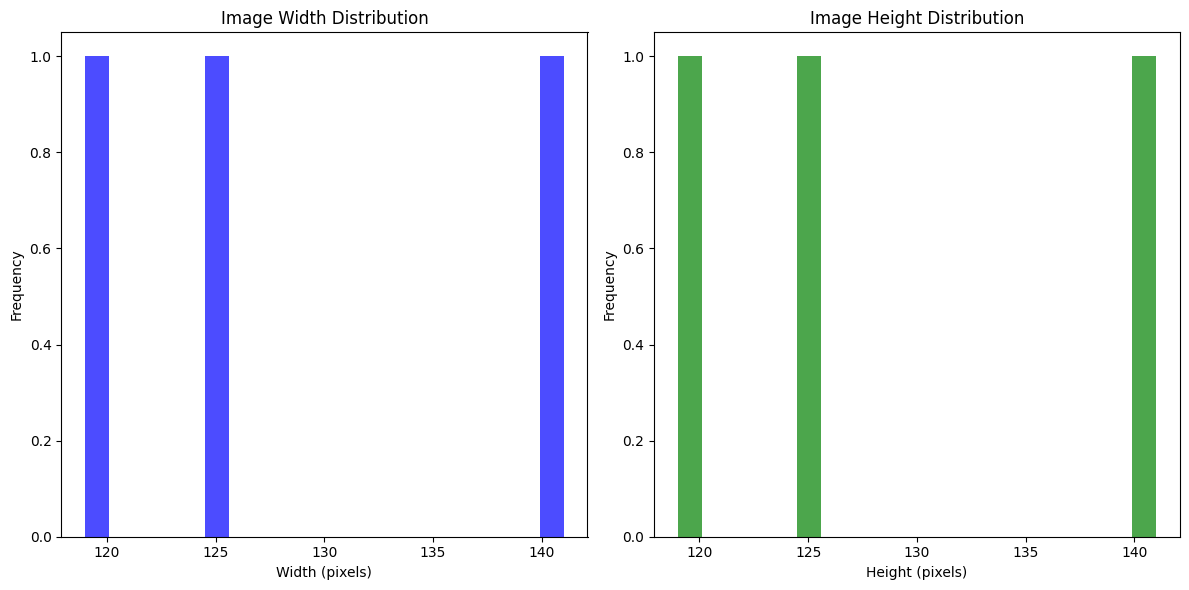

Width range: 119 - 141 pixels
Height range: 119 - 141 pixels
Total number of test images: 3
Number of non-square test images: 0



In [43]:
# Load and analyze train images from HDF5 file
with h5py.File('data/train-image.hdf5', 'r') as f:
    print("Random Train Images")
    display_images(f, num_images=5)
    
    print("Analyzing Train Images")
    train_sizes = get_image_sizes(f)
    plot_image_size_distribution(train_sizes)
    
    train_image_count = get_image_count(f)
    print(f"Total number of train images: {train_image_count}")

    non_square_train_images = check_non_square_images(train_sizes)
    print(f"Number of non-square train images: {len(non_square_train_images)}")
    print()

# Load and analyze test images from HDF5 file
with h5py.File('data/test-image.hdf5', 'r') as f:
    print("Random Test Images")
    display_images(f, num_images=5)
    
    print("Analyzing Test Images")
    test_sizes = get_image_sizes(f)
    plot_image_size_distribution(test_sizes)
    
    test_image_count = get_image_count(f)
    print(f"Total number of test images: {test_image_count}")

    non_square_test_images = check_non_square_images(test_sizes)
    print(f"Number of non-square test images: {len(non_square_test_images)}")
    print()

### Metadata Exploration

### Post-exploration Notes

* Images are all squares but sizes are not standardized and will need to be pre-processed